<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [5]:
## Write your code here
# 1. Count the number of duplicate rows
df.duplicated().sum()

# 2. Display the first few duplicate rows
df[df.duplicated()].head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
65437,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65438,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
65439,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
65440,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
65441,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [8]:
## Write your code here
# Define the subset of columns
subset_cols = ['MainBranch', 'Employment', 'RemoteWork']

# Count duplicates within this specific subset
subset_duplicates_count = df.duplicated(subset=subset_cols).sum()
print(f"Number of rows with duplicate {subset_cols}: {subset_duplicates_count}")

# Display the characteristics of these duplicates
subset_duplicates_df = df[df.duplicated(subset=subset_cols, keep=False)]
print("\nSample of rows with identical Branch, Employment, and Remote status:")
print(subset_duplicates_df[subset_cols].head(10))

# Analyzing which specific combinations are most frequent
frequent_combos = subset_duplicates_df.groupby(subset_cols).size().reset_index(name='Frequency')
print("\nMost frequent identical combinations:")
print(frequent_combos.sort_values(by='Frequency', ascending=False))

# Examine which columns tend to match across these duplicates
dup_similarity = subset_duplicates_df.groupby(subset_cols).agg(lambda x: x.nunique())
print("\nDuplicate similarity:")
print(dup_similarity)

# Identify which columns have identical values across all duplicate rows (global check)
duplicate_column_consistency = df.loc[df.duplicated(keep=False)].nunique(axis=0)

print("\nColumns with identical values across duplicate rows:")
print(duplicate_column_consistency)
# Columns with 1 unique value are identical across all duplicate rows.
# Columns with higher counts vary within those duplicates.

# Columns that are identical across all duplicate rows (unique count = 1)
identical_columns = duplicate_column_consistency[duplicate_column_consistency == 1]

print("\nColumns with exactly 1 unique value across duplicate rows:")
print(identical_columns)


Number of rows with duplicate ['MainBranch', 'Employment', 'RemoteWork']: 64896

Sample of rows with identical Branch, Employment, and Remote status:
                                          MainBranch  \
0                     I am a developer by profession   
1                     I am a developer by profession   
2                     I am a developer by profession   
3                              I am learning to code   
4                     I am a developer by profession   
5                        I code primarily as a hobby   
6  I am not primarily a developer, but I write co...   
7                              I am learning to code   
8                        I code primarily as a hobby   
9                     I am a developer by profession   

                                          Employment RemoteWork  
0                                Employed, full-time     Remote  
1                                Employed, full-time     Remote  
2                                Em

*Note*
>>
- If a column varies a lot across duplicates → not useful for deduplication 
- If a column is identical across duplicates → too generic to define uniqueness 
- If a column is moderately stable and meaningful → good candidate for critical_cols 

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


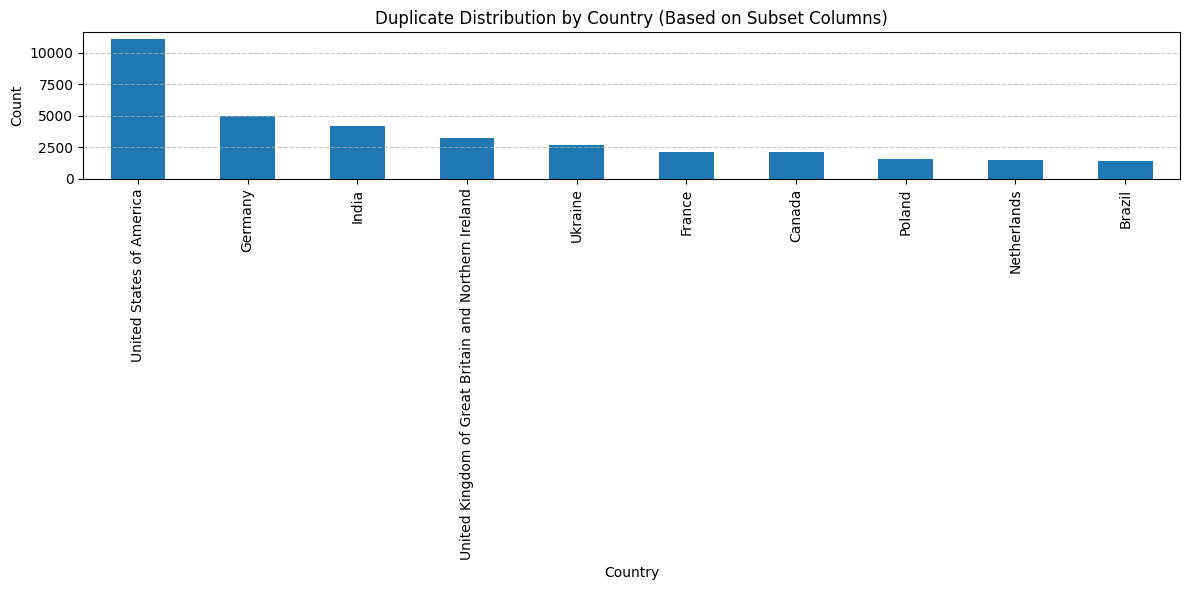

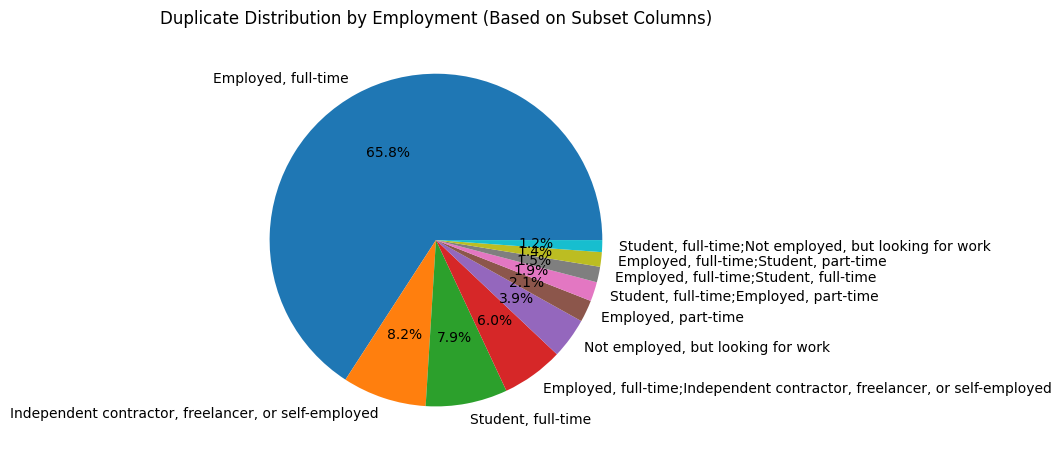

In [10]:
## Write your code here
# Task 3: Visualize Duplicates Distribution

# Distribution of duplicates by Country
country_counts = subset_duplicates_df['Country'].value_counts()

plt.figure(figsize=(12,6))
country_counts.head(10).plot(kind='bar')
plt.title('Duplicate Distribution by Country (Based on Subset Columns)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7) # Optional: adds clarity
plt.show()

# Distribution of duplicates by Employment
employment_counts = subset_duplicates_df['Employment'].value_counts()

plt.figure(figsize=(9,9))
employment_counts.head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Duplicate Distribution by Employment (Based on Subset Columns)')
plt.ylabel('')
plt.tight_layout()
plt.show()



### 1) Your assignment workflow (Tasks 1–3)
You used:

- **Task 1:** full‑row duplicates → `df.duplicated()`
- **Task 2:** subset‑based duplicates → `df.duplicated(subset=subset_cols)`
- **Task 3:** must visualize **subset‑based duplicates**, because Task 2 defines the dataset you analyze

This is the correct assignment flow.


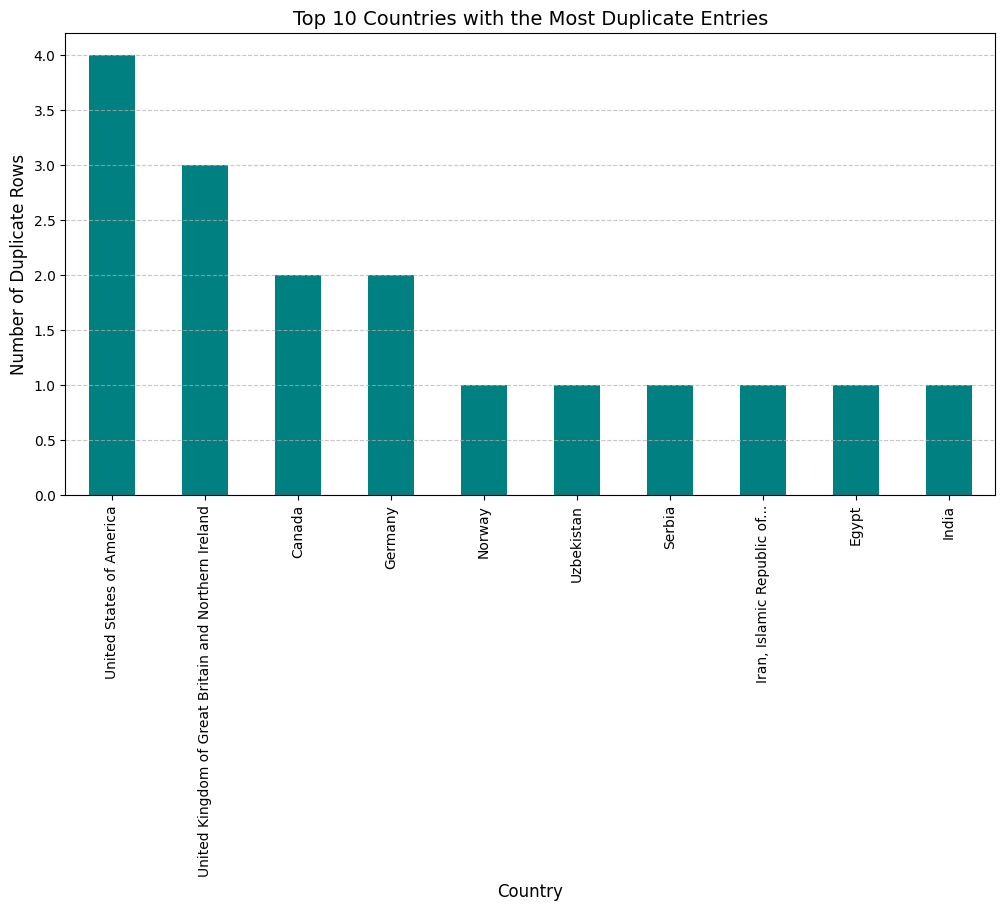

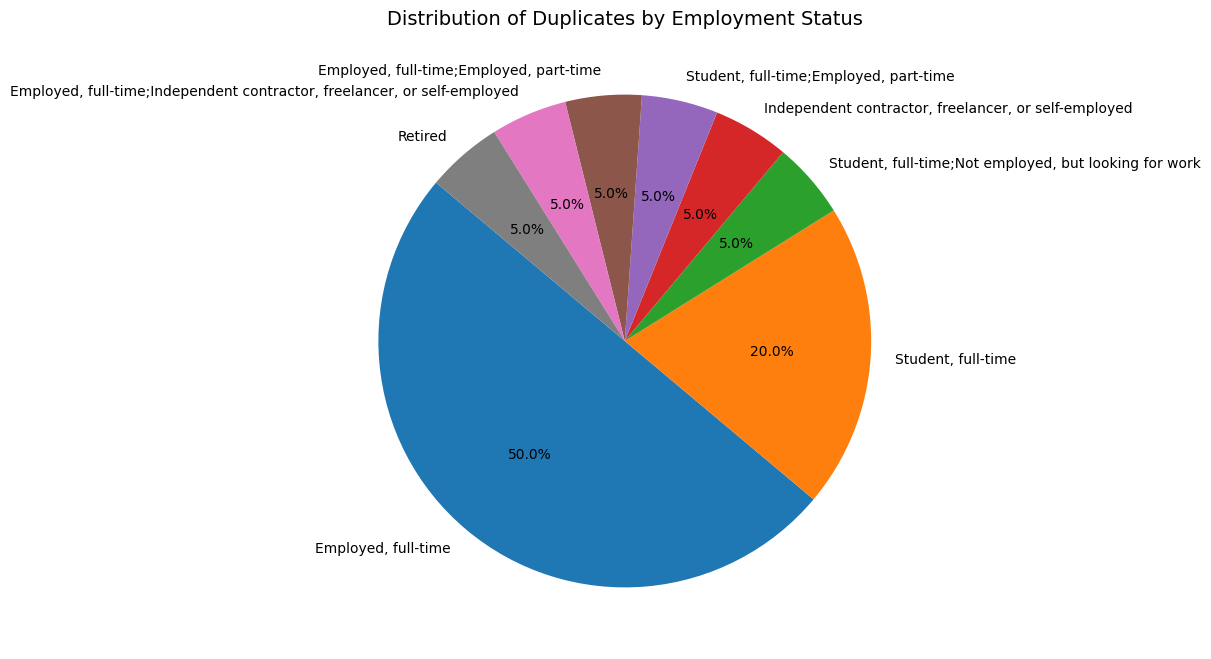

In [11]:
# Isolate the duplicate rows
duplicates_only = df[df.duplicated()]

# --- 1. Bar Chart: Duplicates by Country (Top 10) ---
plt.figure(figsize=(12, 6))
top_countries = duplicates_only['Country'].value_counts().head(10)

# Using pandas .plot(kind='bar') which uses matplotlib
top_countries.plot(kind='bar', color='teal')

plt.title('Top 10 Countries with the Most Duplicate Entries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Duplicate Rows', fontsize=12)
# plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Optional: adds clarity
plt.show()

# --- 2. Pie Chart: Duplicates by Employment ---
plt.figure(figsize=(8, 8))
emp_distribution = duplicates_only['Employment'].value_counts()

# Using matplotlib's native pie function
plt.pie(emp_distribution, labels=emp_distribution.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Duplicates by Employment Status', fontsize=14)
plt.show()

In [17]:
# import matplotlib.pyplot as plt

# # Isolate the duplicate rows first
# duplicates_only = df[df.duplicated()]

# # 1. Distribution by Country (Bar Chart)
# plt.figure(figsize=(10, 6))
# duplicates_only['Country'].value_counts().head(10).plot(kind='bar', color='teal')
# plt.title('Distribution of Duplicates by Country (Top 10)')
# plt.xlabel('Country')
# plt.ylabel('Count')
# plt.grid(axis='y', linestyle='--', alpha=0.7) # Optional: adds clarity
# plt.show()

# # 2. Distribution by Employment (Pie Chart)
# plt.figure(figsize=(8, 8))
# duplicates_only['Employment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
# plt.title('Distribution of Duplicates by Employment Status')
# plt.ylabel('') # Hides the default 'Employment' label on the side
# plt.show()

Only full‑row duplicates
```python
duplicates_only = df[df.duplicated()]

```
- not the subset‑based duplicates from Task 2

- therefore the counts, countries, and employment categories differ

That’s why the visuals look cleaner:
full‑row duplicates are fewer and simpler.

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [12]:
## Write your code here
# Define columns that uniquely identify a respondent
critical_cols = ['MainBranch', 'Employment', 'Country', 'RemoteWork']

# Rows before removal
rows_before = df.shape[0]

# Remove duplicates based on these critical columns
df_dedup = df.drop_duplicates(subset=critical_cols, keep='first')

# Rows after removal
rows_after = df_dedup.shape[0]

print("Rows before:", rows_before) 
print("Rows after:", rows_after) 
print("Rows removed:", rows_before - rows_after)


Rows before: 65457
Rows after: 6941
Rows removed: 58516


In [13]:
# # Alternative strategy
# # Define columns that uniquely identify a respondent
# critical_cols = ['MainBranch', 'Employment', 'Country', 'RemoteWork']

# # Count rows before removal
# rows_before = df.shape[0]

# # Remove duplicates directly from the original dataframe
# df.drop_duplicates(subset=critical_cols, keep='first', inplace=True)

# # Create df_dedup AFTER the in-place operation
# df_dedup = df.copy()

# # Count rows after removal
# rows_after = df_dedup.shape[0]

# print("Rows before:", rows_before)
# print("Rows after:", rows_after)
# print("Rows removed:", rows_before - rows_after)


***Note***
>Based on the duplicate‑similarity analysis in Task 2, the columns MainBranch, Employment, Country, and RemoteWork show consistent patterns across duplicate rows.<br> These fields are therefore used as the uniqueness criteria for strategic deduplication.

Note
>Based on the duplicate‑similarity analysis in Task 2, the columns MainBranch, Employment, Country, and RemoteWork exhibit moderate stability across duplicate groups—stable enough to signal respondent‑level patterns, yet variable enough to distinguish individuals.<br> These fields therefore form an appropriate uniqueness signature for strategic deduplication.

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


### **Summary: Identifying and Removing Duplicates**

The duplicate‑handling process began by checking for exact full‑row duplicates to understand whether any records were completely identical. Since full‑row duplication was rare and did not capture the broader duplication patterns, a deeper analysis was performed using a subset of key columns. The columns **MainBranch**, **Employment**, and **RemoteWork** were examined to identify groups of respondents who shared the same core characteristics. Visualizations of these subset‑based duplicates by country and employment status helped reveal where duplication was most common.

To remove duplicates meaningfully, a set of **critical columns** was selected to define respondent uniqueness: **MainBranch**, **Employment**, **Country**, and **RemoteWork**. These fields represent stable attributes of each respondent and remained consistent across duplicate groups, while other survey fields varied. Using this subset ensured that only genuinely redundant records were removed. The final deduplication step kept the first occurrence of each unique combination and produced a cleaned dataset (`df_dedup`) along with clear before‑and‑after row counts.

2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### **Reasoning Behind Selecting Columns for Duplicate Removal**

The goal was to identify which fields represent the stable, defining characteristics of a respondent so that duplicates could be removed without losing meaningful variation in the survey data. Full‑row duplication was too strict because many records differed in optional or free‑text fields while still describing the same respondent profile. Through the earlier duplicate‑similarity analysis, the columns **MainBranch**, **Employment**, **Country**, and **RemoteWork** consistently matched across suspected duplicate groups. These fields capture a respondent’s role, employment status, geographic location, and work arrangement—attributes that are unlikely to change within the same survey submission. By contrast, other columns (such as tools used, opinions, or compensation) varied more and were not reliable indicators of uniqueness. Selecting these four columns ensured that only genuinely redundant records were removed while preserving legitimate differences in the rest of the dataset.

### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
